# Generic Geometry

Extra-geom allows to create a generic detector. It might be useful, for example, for simulation purposes.
There are no restrictions on the number of modules or tiles there.

To do this, one need to specify the following parameters:

* `pixel_size`: the size of a pixel in meters (reversed CrystFEL's `res`)
* `slow_pixels`, `fast_pixels`: the size of a tile along the slow- and the fast-scan axes
* `ss_vec`, `fs_vec`: 3D unit vectors of the slow- and the fast-scan directions in the lab coordinates (the X-axis
  points to the left, the Y-axis points up, and the Z-axis goes with the beam). Example: np.array([0, 1, 0])
* `corner_coordinates`: 3D coordinates of the first pixel of each module
* `n_tiles_per_module`:  the number of tiles in each module, default=1
* `tile_gap`: the gap between two tiles, default=pixel_size
* `tile_vec`: the direction of tile replication, default=[1, 0, 0], see "**One module, several tiles**" section below


In [1]:
%matplotlib inline
from extra_geom import GenericGeometry
import numpy as np

## One module with one tile

The simplest possible config will create a one-tile detector, with the first pixel in the origin, i.e. (0, 0, 0):

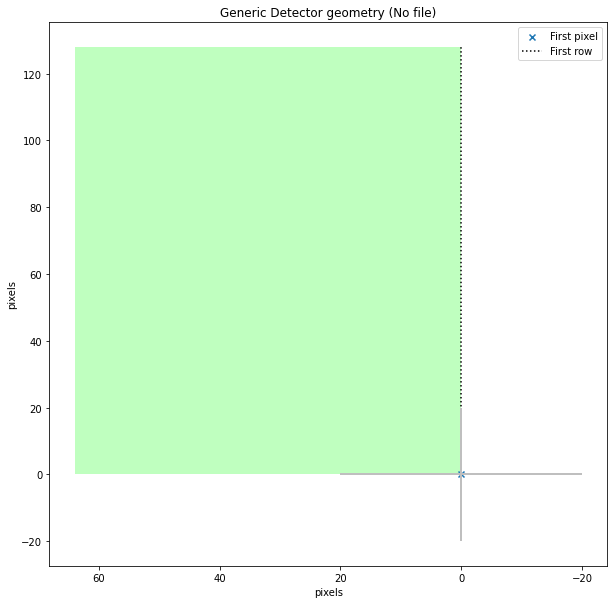

In [2]:
simple_config = {
    'pixel_size': 0.001,
    'slow_pixels': 64,
    'fast_pixels': 128
}
simple = GenericGeometry.from_simple_description(**simple_config)
simple.inspect();

More complicated case is when we set up the corner coordinates and the direction the fast and slow scan axes.

Make sure that these axes are perpendicular.

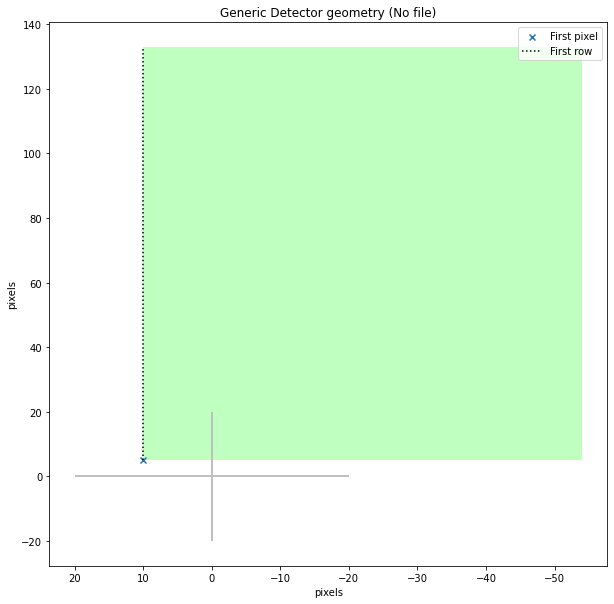

In [3]:
pixel_size = 0.001
simple_config = {
    'pixel_size': pixel_size,
    'slow_pixels': 64,
    'fast_pixels': 128,
    'corner_coordinates': [pixel_size * np.array([10, 5, 0.])],
    'ss_vec': np.array([-1, 0, 0]),
    'fs_vec': np.array([0 , 1, 0]),
}
simple = GenericGeometry.from_simple_description(**simple_config)
simple.inspect();

## One module, several tiles

The concept of _tiles_ allows to "copy and paste" a tile easily.
You just need to set an integer value of `n_tiles_per_module` (by default it is equal to 1):

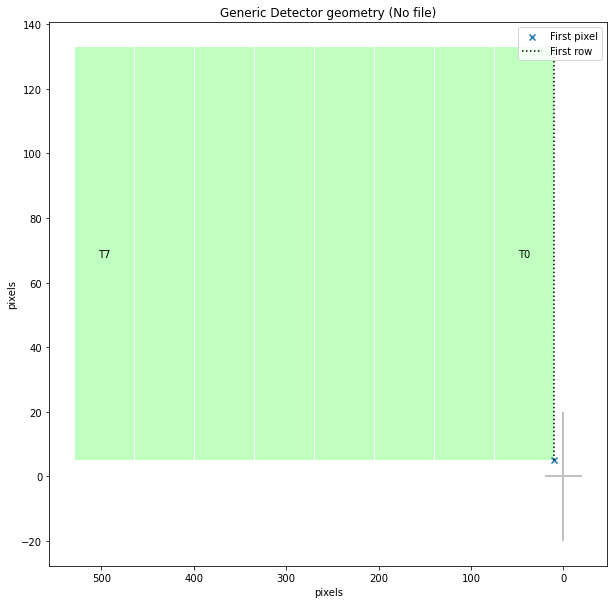

In [4]:
pixel_size = 0.001
simple_config = {
    'pixel_size': pixel_size,
    'fast_pixels': 128,
    'slow_pixels': 64,
    'corner_coordinates': [pixel_size * np.array([10, 5, 0.])],
    'n_tiles_per_module': 8
}
simple = GenericGeometry.from_simple_description(**simple_config)
simple.inspect();

By default, the gap between two tiles is _one pixel size_ but one can adjust it via `tile_gap` (also in meters).
Then, by default, the direction tile replication is the same as slow scan axis `ss_vec`.
However, one can set an arbitrary direction with a vector `tile_vec`.
In the next example, the fast-scan vector `fs_vec = (0, 1, 0)` is co-directed with the Y-axis,
while the tile-replication vector `tile_vec = (0, -1, 0)` is directed opposite to it.
This means that, since Y-axis points up, every next tile is situated _below_ the previous one:

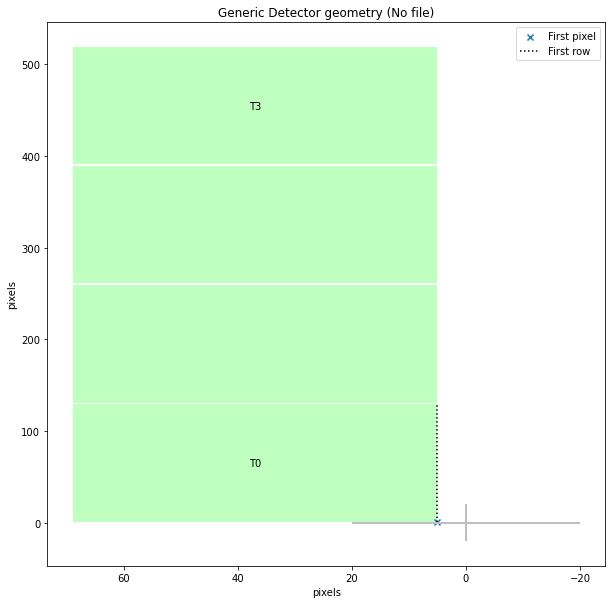

In [5]:
pixel_size = 0.001
simple_config = {
    'pixel_size': pixel_size,
     'slow_pixels': 64,
     'fast_pixels': 128,
     'corner_coordinates': [pixel_size * np.array([5, 1, 0])],
     'n_tiles_per_module': 4,
     'ss_vec': np.array([1, 0, 0]),
     'fs_vec': np.array([0 , 1, 0]),
     'tile_gap': 2 * pixel_size,
     'tile_vec': [0, 1, 0]
}
simple = GenericGeometry.from_simple_description(**simple_config)
simple.inspect();

## Several modules, many tiles

You can set up several detector modules in one config.
In order to do that you simply put as many `corner_coordinates` as you need:

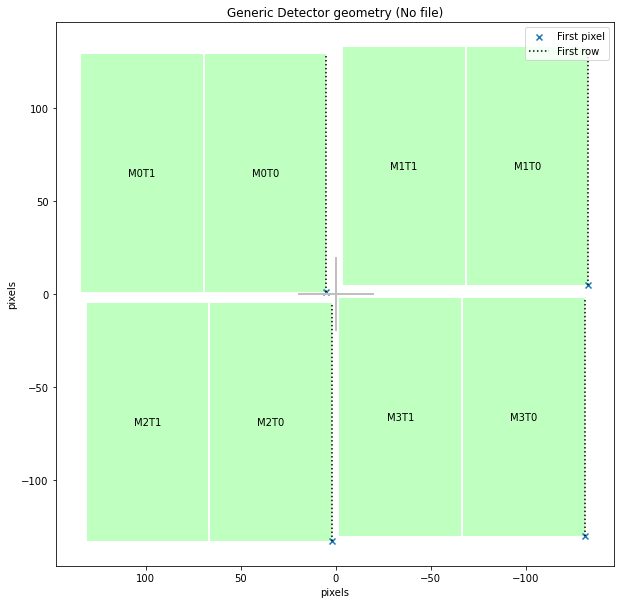

In [6]:
pixel_size = 0.001
simple_config = {
    'pixel_size': pixel_size,
     'slow_pixels': 64,
     'fast_pixels': 128,
     'corner_coordinates': [
         pixel_size * np.array([5, 1, 0]),
         pixel_size * np.array([-133, 5, 0]),
         pixel_size * np.array([2, -133, 0]),
         pixel_size * np.array([-131, -130, 0])
     ],
     'n_tiles_per_module': 2,
     'ss_vec': np.array([1, 0, 0]),
     'fs_vec': np.array([0 , 1, 0]),
}
simple = GenericGeometry.from_simple_description(**simple_config)
simple.inspect();

The code above creates a geometry object for a generic detector.
See these examples for how to use a geometry object:

- [Assemble images](apply_geometry.ipynb)
- [Convert positions in the data array into physical positions](convert_coords.ipynb)
- [Create masks](masks.ipynb)
